In [1]:
import numpy as np
import igraph as ig
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as st

sns.set()

In [111]:
data = pd.read_csv('table_retweets1.csv',nrows=10)

In [112]:
data

,created_at,id_str,user.id,retweeted_status.user.id
0,2013-03-19 10:59:53+00:00,313952961422295040,353934881,NaN
1,2013-03-19 23:00:32+00:00,314134318471593985,419828092,NaN
2,2013-12-12 14:14:54+00:00,411121987369832448,1257609660,NaN
3,2017-05-22 05:47:28+00:00,866515833895473153,264806169,NaN
4,2017-05-25 18:17:39+00:00,867791787007463424,508538467,NaN
5,2017-06-29 08:30:41+00:00,880327646810341377,2878256099,NaN
6,2017-08-21 11:03:36+00:00,899572685264617473,195454642,NaN
7,2017-10-24 12:41:43+00:00,922790204301246464,776465110856589312,NaN
8,2017-12-16 07:26:01+00:00,941917309098168320,410584380,NaN
9,2018-04-06 10:48:19+00:00,982193274319335424,4835674227,NaN


### sistemo database

#### tengo solo i tweet con retweet (tolgo i NaN)

In [2]:
data = pd.read_csv('table_retweets1.csv', low_memory = False)

In [3]:
data_retweet = data[data['retweeted_status.user.id'].isnull() == False].copy()
data_retweet.head()

,created_at,id_str,user.id,retweeted_status.user.id
1249,2020-02-20 08:37:00+00:00,1230395916974247936,369687882,1.007990e+18
1250,2020-02-20 08:37:11+00:00,1230395960221630465,911650004955226113,1.469192e+09
1251,2020-02-20 08:37:24+00:00,1230396015137525761,480544142,3.840013e+07
1252,2020-02-20 08:37:35+00:00,1230396061497413632,1440784603,4.806271e+07
1253,2020-02-20 08:37:45+00:00,1230396104405110786,2305735179,4.855866e+08


####  aggiungo colonna per la data

In [6]:
#columns type
print(type(data.created_at[0]),type(data.id_str[0]), type(data['user.id'][0]),type(data['retweeted_status.user.id']))

<class 'str'> <class 'numpy.int64'> <class 'numpy.int64'> <class 'pandas.core.series.Series'>


In [187]:
#data_retweet['created_at'] = pd.to_datetime(data_retweet['created_at'])
data_retweet['date'] = data_retweet['created_at'].apply(lambda x: x[5:10])
data_retweet.head()

,created_at,id_str,user.id,retweeted_status.user.id,date
1249,2020-02-20 08:37:00+00:00,1230395916974247936,369687882,1.007990e+18,02-20
1250,2020-02-20 08:37:11+00:00,1230395960221630465,911650004955226113,1.469192e+09,02-20
1251,2020-02-20 08:37:24+00:00,1230396015137525761,480544142,3.840013e+07,02-20
1252,2020-02-20 08:37:35+00:00,1230396061497413632,1440784603,4.806271e+07,02-20
1253,2020-02-20 08:37:45+00:00,1230396104405110786,2305735179,4.855866e+08,02-20


### distribuzione retweets giornaieri

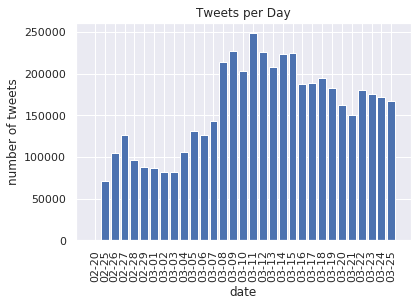

In [8]:
#ragrruppo in base al mese e al giorno
count_per_day = data_retweet.groupby('date',as_index=False).count()

plt.xlabel('date')
plt.ylabel('number of tweets')
plt.title('Tweets per Day')
plt.xticks(count_per_day.index,count_per_day.date, rotation= 'vertical')
plt.bar(count_per_day.index,count_per_day.id_str)
plt.show()

#### aggiungo colonna per contare i giorni

In [188]:
data_retweet['day_count'] = data_retweet.groupby('date').ngroup().values

In [34]:
data_retweet.head()

,created_at,id_str,user.id,retweeted_status.user.id,date,day_count
1249,2020-02-20 08:37:00+00:00,1230395916974247936,369687882,1.007990e+18,02-20,0
1250,2020-02-20 08:37:11+00:00,1230395960221630465,911650004955226113,1.469192e+09,02-20,0
1251,2020-02-20 08:37:24+00:00,1230396015137525761,480544142,3.840013e+07,02-20,0
1252,2020-02-20 08:37:35+00:00,1230396061497413632,1440784603,4.806271e+07,02-20,0
1253,2020-02-20 08:37:45+00:00,1230396104405110786,2305735179,4.855866e+08,02-20,0


#### aggiungo una colonna per i pesi del network

In [192]:
data_retweet['weight'] = 1

#### salvo il nuovo dataset

In [193]:
data_retweet.to_csv('data_retweet',index=False)

#### costruisco un network di 3 giorni: 20,25,26 febbraio

In [116]:
sub_set = data_retweet[data_retweet.day_count < 3]
sub_set_3_days = sub_set.copy()

In [117]:
#raggruppo i tweet in base a utente del tweet ed utente del retweet, che sono target e source del network
#'retweeted_status.user.id' è l'id di colui che è stato retweetato da 'user.id'
db_for_network = sub_set_3_days.groupby(['retweeted_status.user.id','user.id'], as_index=False).count()

In [118]:
db_for_network.head()

,retweeted_status.user.id,user.id,created_at,id_str,date,day_count,weight
0,45763.0,218488177,1,1,1,1,1
1,394613.0,2002721,1,1,1,1,1
2,394613.0,3015121,1,1,1,1,1
3,394613.0,7830782,1,1,1,1,1
4,394613.0,11198782,1,1,1,1,1


#### tengo solo i link con peso > 1, così da evitare eventuale rumore 

In [125]:
db_for_network = db_for_network[db_for_network.weight > 1]#.astype(int) #per comodità metto tutti i valori interi, anche per evitar problemi se si usa Graph.DataFrame che trasforma in stringa e ci sarebbero problemi a confrontare str(int) e str(float)
print('numero link della rete:',len(db_for_network))
db_for_network.head()

numero link della rete: 14003


,retweeted_status.user.id,user.id,created_at,id_str,date,day_count,weight
10,394613,169112670,3,3,3,3,3
111,673203,29482112,2,2,2,2,2
122,673203,545448505,2,2,2,2,2
146,814227,40985455,2,2,2,2,2
159,814227,151482583,2,2,2,2,2


#### costruisco il network

In [40]:
#prova per vedere come funziona Graph.DataFrame
aaa_df = pd.DataFrame({'s':[1,2,3,4],'t':[3,4,5,6],'w':[1,2,1,1]})
aaa_df_v = pd.DataFrame({'name' : np.unique(aaa_df.values[:,:2])})

In [41]:
print(aaa_df)
print(aaa_df_v)

   s  t  w
0  1  3  1
1  2  4  2
2  3  5  1
3  4  6  1
   name
0     1
1     2
2     3
3     4
4     5
5     6


In [43]:
# dataframe deve essere in formato stringa altrimenti non funziona
aaa_g = ig.Graph.DataFrame(aaa_df.astype(str),vertices = aaa_df_v)

In [44]:
aaa_g.summary()

'IGRAPH DN-- 6 4 -- \n+ attr: name (v), w (e)'

#### uso TupleList che è più rapido

In [126]:
graph_3_days = ig.Graph.TupleList(db_for_network[['retweeted_status.user.id','user.id','weight']].itertuples(index=False), directed=True, weights=True)

In [127]:
graph_3_days.summary()

'IGRAPH DNW- 7787 14003 -- \n+ attr: name (v), weight (e)'

### Analisi delle misure di centralita

In [3]:
#definisco una funzione per il calcolo delle misure, che restituisca un dataframe 
def centrality_measures(graph, df, weights = None):
    # graph = igraph.Graph object
    # df = pandas.DataFrame object
    df['name'] = graph.vs['name']
    df['betweenness'] = graph.betweenness(weights=weights)
    df['pagerank'] = graph.pagerank(weights=weights)
    df['degree'] = graph.degree()
    df['outdegree'] = graph.outdegree()
    df['local_transitivity'] = graph.transitivity_local_undirected(mode = 'zero',weights=weights)
    if graph.is_simple():
        df['knn'] = graph.knn(weights=weights)
    return df

In [134]:
measures_3_days = centrality_measures(graph_3_days,pd.DataFrame(),weights ='weight')
measures_3_days.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,0.0,0.000099,1,1,0.0
1,169112670,0.0,0.000183,1,0,0.0
2,673203,0.0,0.000099,2,2,0.0
3,29482112,0.0,0.000141,1,0,0.0
4,545448505,0.0,0.000141,1,0,0.0


#### analisi in periodi più lunghi, una settimana, un mese

#### Costruisco un funzione che automatizzi il processo

In [240]:
def build_graph(fini_day,init_day = 0):
    sub_set = data_retweet[(data_retweet.day_count >= init_day)&(data_retweet.day_count < fini_day)]
    db_for_network = sub_set.groupby(['retweeted_status.user.id','user.id'], as_index=False).count()
    db_for_network = db_for_network[db_for_network.weight > 1]#.astype(int)
    return ig.Graph.TupleList(db_for_network[['retweeted_status.user.id','user.id','weight']].itertuples(index=False), directed=True, weights=True)

##### una settimana

In [136]:
measures_7_days = centrality_measures(build_graph(7),pd.DataFrame(),weights ='weight')
measures_7_days.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,0.0,0.000035,24,24,0.000000
1,2002721,0.0,0.000038,2,0,0.000000
2,16192743,0.0,0.000036,1,0,0.000000
3,29521878,0.0,0.000051,12,0,0.074747
4,54964150,0.0,0.000036,1,0,0.000000


##### un mese

In [131]:
measures_30_days = centrality_measures(build_graph(30),pd.DataFrame(),weights ='weight')
measures_30_days.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,22083.0,0.000000e+00,0.000007,1,1,0.000000
1,70054648.0,1.263340e+05,0.000185,70,14,0.083783
2,394613.0,1.806557e+06,0.000012,234,232,0.012486
3,808231.0,0.000000e+00,0.000009,27,0,0.201450
4,2002721.0,0.000000e+00,0.000008,23,0,0.066535


##### due sttimane

In [138]:
measures_first_2_week = centrality_measures(build_graph(14),pd.DataFrame(),weights='weight')
measures_first_2_week.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613,1314.600000,0.000017,119,118,0.008502
1,808231,0.000000,0.000018,11,0,0.211321
2,2002721,0.000000,0.000018,8,0,0.000000
3,9584192,25412.128236,0.000020,54,41,0.113546
4,13056322,0.000000,0.000017,1,0,0.000000


##### ultime due settimane

In [245]:
measures_last_2_week = centrality_measures(build_graph(31,15),pd.DataFrame(),weights='weight')
measures_last_2_week.head()

,name,betweenness,pagerank,degree,outdegree,local_transitivity
0,394613.0,223248.791382,0.000018,67,66,0.008589
1,7046912.0,0.000000,0.000010,4,0,0.000000
2,7697992.0,141976.732162,0.000011,71,66,0.046981
3,9497072.0,0.000000,0.000016,43,0,0.088820
4,9831832.0,0.000000,0.000009,9,0,0.115000


#### Salvo le misure

In [145]:
measures_3_days.to_csv('measures/measures_3_days',index=False)
measures_7_days.to_csv('measures/measures_7_days',index=False)
measures_30_days.to_csv('measures/measures_30_days',index=False)
measures_first_2_week.to_csv('measures/measures_first_2_week', index= False)
measures_last_2_week.to_csv('measures/measures_last_2_week', index= False)

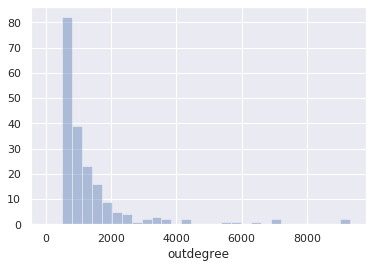

In [103]:
#degree distribution after degree 500
sns.distplot(measures_30_days.outdegree,bins=np.linspace(500,measures_30_days.outdegree.max(),30), kde=False)

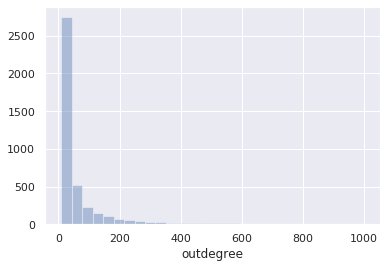

In [113]:
#distribution between 10 and 1000
sns.distplot(measures_30_days.outdegree,bins=np.linspace(10,1000,30),kde=False)

#### guardo gli utenti più retweetati

In [9]:
#guardo i 20 con degree più alto
top_20_retweeted = measures_30_days.sort_values('outdegree')['name'].values[-20:]

#### incorcio col file metadata per capire i nomi degli utenti

In [208]:
pd.read_csv('transfer_41033_files_4cf7ccc6(1)/table_metadata.csv', nrows = 5)

,id_str,text,retweeted_status.id,user.screen_name,user.followers_count,user.location
0,313952961422295040,http://t.co/LqhmyOCsUB | Coronavirus: sarà la ...,NaN,urcaurcait,7,Italia
1,314134318471593985,La prossima pandemia sará scatenata dal corona...,NaN,alle_iccir,521,Purgatorio
2,411121987369832448,Isoliamo il virus del buon senso e diffondiamo...,NaN,AleLinari,212,Romagna
3,866515833895473153,Che sempre più persone credono in teorie bisla...,NaN,AsinoMorto,18035,Generalmente eretta
4,867791787007463424,Mai un'epidemia di intelligenza,NaN,mcomemax,2614,reggio emilia


In [133]:
#aggiunta si lineterminator = '\n' per evitare un errore che si h anel caricamento del file
chunksize = 10**5
meta_data=pd.DataFrame()
for chunk in pd.read_csv('transfer_41033_files_4cf7ccc6(1)/table_metadata.csv', chunksize=chunksize, lineterminator='\n'):
    meta_data = pd.concat([meta_data, chunk])

In [140]:
new_meta = meta_data[meta_data['retweeted_status.id'].isnull() == False]

In [144]:
new_meta.to_csv('file_metadata.csv',index=False)

In [146]:
new_meta[new_meta['retweeted_status.id'].isin(top_20_retweeted)].head()

,id_str,text,retweeted_status.id,user.screen_name,user.followers_count,user.location


gli id nel file metadata.csv sembrerebbero diversi da quelli del file rewteets.csv, poichè nel primo non compaiono e nel secondo si

In [138]:
data_retweet[data_retweet['retweeted_status.user.id'].isin(top_20_retweeted)].head()

,created_at,id_str,user.id,retweeted_status.user.id,date,day_count,weight
21,2020-02-20 08:43:08+00:00,1230397459932774401,2278132116,7.328175e+17,02-20,0,1
23,2020-02-20 08:43:42+00:00,1230397601658343426,420977208,7.328175e+17,02-20,0,1
49,2020-02-20 08:51:02+00:00,1230399448083288064,3207950973,9.944532e+17,02-20,0,1
50,2020-02-20 08:51:11+00:00,1230399483558727680,1131588822,7.328175e+17,02-20,0,1
58,2020-02-20 08:53:14+00:00,1230400000997416962,1022095164406476800,5.893702e+06,02-20,0,1


#### Confronto misure

In [8]:
#ricarico le misure calcolate
measures_3_days=pd.read_csv('measures/measures_3_days')
measures_7_days=pd.read_csv('measures/measures_7_days')
measures_30_days=pd.read_csv('measures/measures_30_days')
measures_first_2_week=pd.read_csv('measures/measures_first_2_week')
measures_last_2_week=pd.read_csv('measures/measures_last_2_week')

In [151]:
def norm_betweenness(series):
    n = len(series)
    return series / ((n-1)*(n-2))

In [152]:
measures_3_days['norm_betweenness']=norm_betweenness(measures_3_days['betweenness'])
measures_7_days['norm_betweenness']=norm_betweenness(measures_7_days['betweenness'])
measures_30_days['norm_betweenness']=norm_betweenness(measures_30_days['betweenness'])
measures_first_2_week['norm_betweenness']=norm_betweenness(measures_first_2_week['betweenness'])
measures_last_2_week['norm_betweenness']=norm_betweenness(measures_last_2_week['betweenness'])


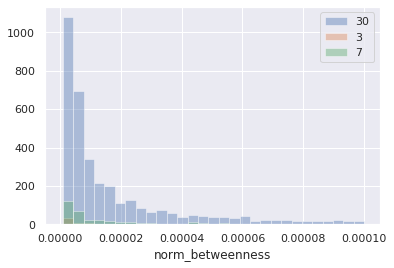

In [153]:
sns.distplot(measures_30_days.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
sns.distplot(measures_3_days.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
sns.distplot(measures_7_days.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
plt.legend(['30','3','7'])

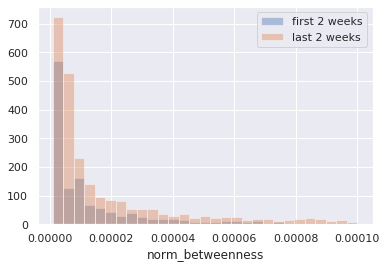

In [91]:
sns.distplot(measures_first_2_week.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
sns.distplot(measures_last_2_week.norm_betweenness, kde=False, bins=np.linspace(1e-6,1e-4,30))
plt.legend(['first 2 weeks', 'last 2 weeks'])

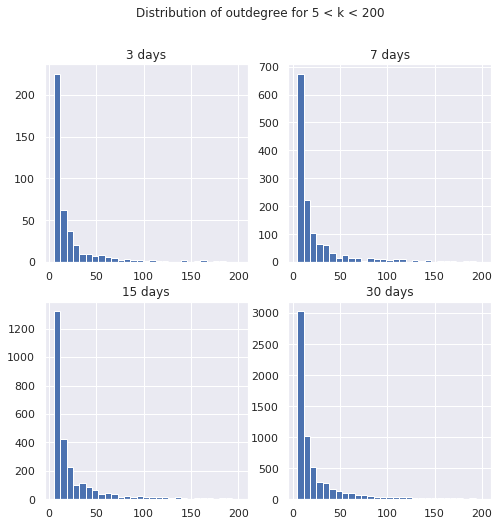

In [122]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize= (8,8))
fig.suptitle('Distribution of outdegree for 5 < k < 200')
ax1.hist(measures_3_days.outdegree, bins = np.linspace(5,200,30))
ax1.set_title('3 days')
ax2.hist(measures_7_days.outdegree, bins = np.linspace(5,200,30))
ax2.set_title('7 days')
ax3.hist(measures_first_2_week.outdegree, bins = np.linspace(5,200,30))
ax3.set_title('15 days')
ax4.hist(measures_30_days.outdegree, bins = np.linspace(5,200,30))
ax4.set_title('30 days')
plt.show()

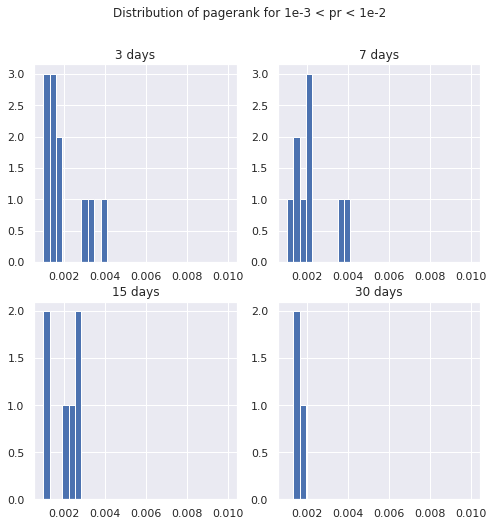

In [133]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize= (8,8))
fig.suptitle('Distribution of pagerank for 1e-3 < pr < 1e-2')
ax1.hist(measures_3_days.pagerank, bins = np.linspace(1e-3,0.01,30))
ax1.set_title('3 days')
ax2.hist(measures_7_days.pagerank, bins = np.linspace(1e-3,0.01,30))
ax2.set_title('7 days')
ax3.hist(measures_first_2_week.pagerank, bins = np.linspace(1e-3,0.01,30))
ax3.set_title('15 days')
ax4.hist(measures_30_days.pagerank, bins = np.linspace(1e-3,0.01,30))
ax4.set_title('30 days')
plt.show()

### Ricerca dei leader

##### betweenness

In [154]:
top_100_btwn = pd.DataFrame({'30_days' : measures_30_days.sort_values('betweenness')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('betweenness')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('betweenness')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('betweenness')['name'].values[-100:]})

In [176]:
top_100_btwn.head()

,30_days,15_days,7_days,3_days
0,52424550,986811270,1007990392279748608,1062799087
1,1575496556,96853674,18935802,156931889
2,69569643,1490509230,804354408,500882938
3,361985955,479810905,861946438439383040,3426504598
4,856216775830253568,547936685,493833883,903898838


In [155]:
#chi compare in più set temporali?
counter_btwn = Counter(np.concatenate([i for i in top_100_btwn.values]))

([<matplotlib.axis.XTick at 0x7f9cdc57d940>,
 <a list of 4 Text xticklabel objects>)

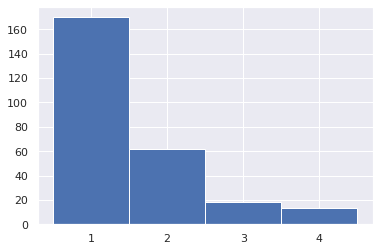

In [158]:
plt.hist(list(counter_btwn.values()),  bins= np.linspace(0.5,4.5,5))
plt.xticks([1,2,3,4])

a differenza della connettività i nodi con maggiore bewteenness cambiano nel tempo

In [157]:
max(list(counter_btwn.values()))

3

#####  pagerank

In [159]:
top_100_pr = pd.DataFrame({'30_days' : measures_30_days.sort_values('pagerank')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('pagerank')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('pagerank')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('pagerank')['name'].values[-100:]})

In [162]:
counter_pr = Counter(np.concatenate([i for i in top_100_pr.values]))

([<matplotlib.axis.XTick at 0x7f9ccd928668>,
 <a list of 4 Text xticklabel objects>)

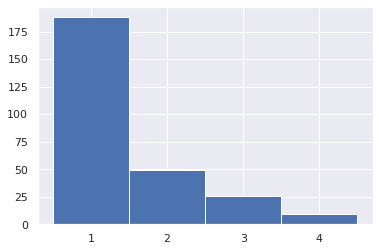

In [163]:
plt.hist(list(counter_pr.values()),  bins= np.linspace(0.5,4.5,5))
plt.xticks([1,2,3,4])

#####  clustering coefficient

In [164]:
top_100_cc = pd.DataFrame({'30_days' : measures_30_days.sort_values('local_transitivity')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('local_transitivity')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('local_transitivity')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('local_transitivity')['name'].values[-100:]})

([<matplotlib.axis.XTick at 0x7f9ccd899cc0>,
 <a list of 4 Text xticklabel objects>)

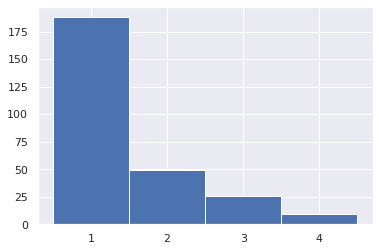

In [165]:
counter_pr = Counter(np.concatenate([i for i in top_100_pr.values]))
plt.hist(list(counter_pr.values()),  bins= np.linspace(0.5,4.5,5))
plt.xticks([1,2,3,4])

##### Outdegree

In [166]:
top_100_k = pd.DataFrame({'30_days' : measures_30_days.sort_values('outdegree')['name'].values[-100:],
                            '15_days' : measures_first_2_week.sort_values('outdegree')['name'].values[-100:],
                            '7_days' : measures_7_days.sort_values('outdegree')['name'].values[-100:],
                            '3_days' : measures_3_days.sort_values('outdegree')['name'].values[-100:]})

([<matplotlib.axis.XTick at 0x7f9ccd86c1d0>,
 <a list of 4 Text xticklabel objects>)

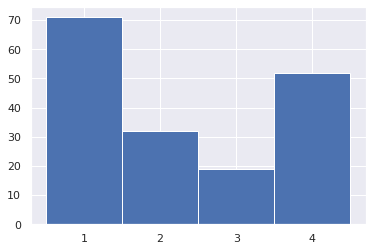

In [167]:
counter_k = Counter(np.concatenate([i for i in top_100_k.values]))
plt.hist(list(counter_k.values()),  bins= np.linspace(0.5,4.5,5))
plt.xticks([1,2,3,4])

##  Community Detection

In [3]:

data_retweet = pd.read_csv('data_retweet')

In [6]:
g_3 = build_graph(3)
g_7 = build_graph(7)
g_15 = build_graph(15)
g_30 = build_graph(30)


In [7]:
g_3.summary()

'IGRAPH DNW- 7787 14003 -- \n+ attr: name (v), weight (e)'

In [9]:
#serve undirected network per analizzare il clstering
g_3.to_undirected(combine_edges='sum')
cl_3 = g_3.community_multilevel(weights='weight',return_levels=False)

In [10]:
g_3.vs['membership'] = cl_3.membership

In [90]:
g_7.to_undirected(combine_edges='sum')
cl_7 = g_7.community_multilevel(weights='weight',return_levels=False)
g_15.to_undirected(combine_edges='sum')
cl_15 = g_15.community_multilevel(weights='weight',return_levels=False)
g_30.to_undirected(combine_edges='sum')
cl_30 = g_30.community_multilevel(weights='weight',return_levels=False)

In [91]:
g_7.vs['membership'] = cl_7.membership
g_15.vs['membership'] = cl_15.membership
g_30.vs['membership'] = cl_30.membership

In [172]:
print('number of communities :\t',max(cl_3.membership)+1,
     max(cl_7.membership)+1,
     max(cl_15.membership)+1,
     max(cl_30.membership)+1)
print('nmber of vertex: \t',len(g_3.vs),
     len(g_7.vs),
     len(g_15.vs),
     len(g_30.vs),)

number of communities :	 524 1058 1743 3022
nmber of vertex: 	 7787 21350 51366 106770


Guardo come cambiano le community dei leader

In [176]:
#guardo i 100 con outdegree più alto 
top_100_retweeted  = measures_30_days.sort_values('outdegree')['name'][-100:]

In [177]:
measures_30_days.sort_values('outdegree')['outdegree'].values[-100:]

array([ 845,  850,  858,  862,  865,  878,  879,  895,  899,  921,  927,
        937,  951,  956,  980,  987,  998, 1006, 1014, 1017, 1025, 1047,
       1052, 1060, 1062, 1080, 1088, 1097, 1117, 1139, 1139, 1141, 1144,
       1156, 1172, 1192, 1192, 1201, 1204, 1210, 1214, 1214, 1222, 1250,
       1278, 1297, 1299, 1300, 1341, 1366, 1405, 1417, 1432, 1493, 1494,
       1495, 1495, 1499, 1522, 1568, 1579, 1583, 1621, 1628, 1678, 1686,
       1727, 1753, 1755, 1763, 1777, 1790, 1794, 1868, 1994, 2027, 2089,
       2174, 2183, 2257, 2320, 2350, 2492, 2496, 3036, 3109, 3120, 3272,
       3468, 3591, 3634, 4129, 4301, 5451, 5598, 6212, 6896, 7060, 8758,
       9146])

quanti di questi sono nella giant component?

In [224]:
giant3= cl_3.giant()
giant7= cl_7.giant()
giant15= cl_15.giant()
giant30= cl_30.giant()
print(giant3.summary())
print(giant7.summary())
print(giant15.summary())
print(giant30.summary())

IGRAPH UNW- 4857 7930 -- 
+ attr: membership (v), name (v), weight (e)
IGRAPH UNW- 4721 9293 -- 
+ attr: membership (v), name (v), weight (e)
IGRAPH UNW- 12050 34017 -- 
+ attr: membership (v), name (v), weight (e)
IGRAPH UNW- 24720 63915 -- 
+ attr: membership (v), name (v), weight (e)


In [211]:
leader_giant_30 = top_100_retweeted[top_100_retweeted.isin(giant30.vs['name'])]
len(leader_giant_30)

22

In [182]:
leader_giant_3 = top_100_retweeted[top_100_retweeted.isin(giant3.vs['name'])]
leader_giant_15 = top_100_retweeted[top_100_retweeted.isin(giant15.vs['name'])]
leader_giant_7 = top_100_retweeted[top_100_retweeted.isin(giant7.vs['name'])]

In [192]:
#costruisco un dataframe con gli utenti più retwittati in assoluto, che compaiono nelle varie giant component
leader_df = pd.concat([leader_giant_3,leader_giant_7,leader_giant_15,leader_giant_30],axis=1)

In [207]:
leader_df.columns = ['3_days','7_days','15_days','30_days']
leader_df.index = range(len(leader_df))

In [208]:
leader_df.head()

,3_days,7_days,15_days,30_days
0,NaN,39240661.0,39240661.0,NaN
1,NaN,NaN,133790890.0,NaN
2,NaN,14724500.0,14724500.0,NaN
3,NaN,NaN,NaN,5893702.0
4,276698656.0,276698656.0,276698656.0,NaN


In [210]:
leader_df.count().values

array([53, 16, 21, 22])

#### come cambia la comunità dell'utente pù retweetato

In [215]:
measures_30_days.sort_values('outdegree').iloc[-1]

name                  1.100777e+18
betweenness           3.551848e+07
pagerank              7.058861e-06
degree                9.149000e+03
outdegree             9.146000e+03
local_transitivity    2.683199e-03
norm_betweenness      3.115789e-03
Name: 59684, dtype: float64

In [216]:
top_influencer = measures_30_days.sort_values('outdegree')['name'].iloc[-1]

In [217]:
top_influencer

1.100776937004458e+18

In [220]:
[v['membership'] for v in g_30.vs if v['name'] == top_influencer]

[5]

non è la giant component

In [221]:
giant30.vs['membership'][0]

2

In [222]:
top_influencer_community= cl_30.subgraph(5)

In [223]:
top_influencer_community.summary()

'IGRAPH UNW- 15218 150322 -- \n+ attr: membership (v), name (v), weight (e)'

In [295]:
print('n_cl \t n_cl/n_vert \t\t n_cl/n_links \n')
for clusters,graph in [(cl_3,g_3),(cl_7,g_7),(cl_15,g_15),(cl_30,g_30)]:
    idx  = [v['membership'] for v in graph.vs if v['name'] == top_influencer][0]
    top_influencer_community= clusters.subgraph(idx)
    print(len(top_influencer_community.vs),'\t',len(top_influencer_community.vs)/len(graph.vs),
          '\t',len(top_influencer_community.vs)/len(graph.es))

n_cl 	 n_cl/n_vert 		 n_cl/n_links 

4857 	 0.6237318607936304 	 0.34720137250696975
4367 	 0.20454332552693208 	 0.07303041958626687
8638 	 0.16816571272826383 	 0.04573952089466884
15218 	 0.14253067341013392 	 0.029306187846155032


c'è un aumento della grandezza del cluster ma diminuisce relativamente al numero totale di nodi della rete e dei link

#### confronto settimana per settimana

In [303]:
graph_week = []
for init,fini in [(1,8),(9,16),(17,23),(24,31)]:
    graph_week.append(build_graph(fini,init))

In [304]:
cluster_week = []
for g in graph_week:
    g.to_undirected(combine_edges='sum')
    cluster_week.append(g.community_multilevel(weights='weight',return_levels=False))

In [308]:
print('n_cl \t n_cl/n_vert \t\t n_cl/n_links \n')
n_rel_v = []
n_rel_e = []
for g,cl in zip(graph_week,cluster_week):
    g.vs['membership'] = cl.membership
    idx  = [v['membership'] for v in g.vs if v['name'] == top_influencer][0]
    top_influencer_community= cl.subgraph(idx)
    n_rel_v.append(len(top_influencer_community.vs)/len(g.vs))
    n_rel_e.append(len(top_influencer_community.vs)/len(g.es))
    print(len(top_influencer_community.vs),'\t',len(top_influencer_community.vs)/len(g.vs),
          '\t',len(top_influencer_community.vs)/len(g.es))
    

n_cl 	 n_cl/n_vert 		 n_cl/n_links 

4585 	 0.19332124636336806 	 0.06595414137345723
6784 	 0.1597814310612841 	 0.053722738719333536
7762 	 0.17412567018866232 	 0.05869275905873813
8571 	 0.19249859629421673 	 0.06372348572150807


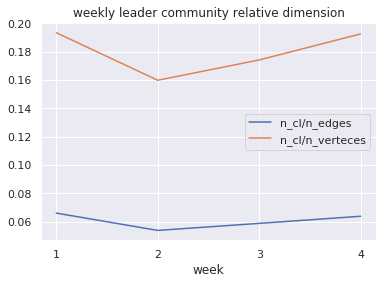

In [313]:
plt.plot(n_rel_e)
plt.plot(n_rel_v)
plt.legend(['n_cl/n_edges', 'n_cl/n_verteces'])
plt.xticks(range(4),labels=[1,2,3,4])
plt.xlabel('week')
plt.title('weekly leader community relative dimension')
plt.show()

#### provo usando il file .pickle

In [4]:
import pickle

In [3]:
with open('data/pickles/df_metadata.pickle','rb') as f:
    df_meta=pickle.load(f)

poichè è troppo pesante, tengo solo i retweet e alcune colonne, e del testo solo il nome di chi è retweetato

In [4]:
with open('data/pickles/short_df.pickle','wb') as file:
    df_meta = df_meta[df_meta['retweeted_status.id'].isnull() == False]
    df_meta.text = df_meta['text'].astype(str).apply(lambda x: x.split(' ')[1])
    pickle.dump(df_meta[['id_str','text','retweeted_status.id','user.screen_name','user.followers_count']],file)

carico ora il file leggero

In [4]:
with open('data/pickles/short_df.pickle','rb') as f:
    df_meta=pickle.load(f)

In [5]:
df_meta.head()

,id_str,text,retweeted_status.id,user.screen_name,user.followers_count
0,1230395916974247936,@lunastorta13:,1230274860598857734,WTrumpy,1134
1,1230395960221630465,@TELADOIOLANIUS:,1229672160177815552,Enzaedma60,271
2,1230396015137525761,@ChannelNewsAsia:,1230394924324884480,Snzgmz,304
3,1230396061497413632,@luigidimaio:,1229856576812601345,DomenicoMazzil5,1914
4,1230396104405110786,@vfeltri:,1229407597150842881,stefano_zanone,16


In [6]:
df_meta['text']=df_meta['text'].apply(lambda x: x.split('@')[1].split(':')[0])

In [7]:
df_meta = df_meta.rename(columns = {'text':'retweeted_username'})

In [8]:
df_meta.head()

,id_str,retweeted_username,retweeted_status.id,user.screen_name,user.followers_count
0,1230395916974247936,lunastorta13,1230274860598857734,WTrumpy,1134
1,1230395960221630465,TELADOIOLANIUS,1229672160177815552,Enzaedma60,271
2,1230396015137525761,ChannelNewsAsia,1230394924324884480,Snzgmz,304
3,1230396061497413632,luigidimaio,1229856576812601345,DomenicoMazzil5,1914
4,1230396104405110786,vfeltri,1229407597150842881,stefano_zanone,16


In [10]:
with open('data/pickles/short_df.pickle','wb') as f:
    pickle.dump(df_meta,f)

In [19]:
Burioni_rt = df_meta[df_meta.retweeted_username == 'RobertoBurioni']['id_str'].values  #id dei tweet che rewtittano burioni

#### invece degli id numerici, costruisco la rete con gli username

In [11]:
types = {'created_at':str, 'id_str':str, 'user.id':str, 'retweeted_status.user.id':str, 'date':str,'day_count':int, 'weight':int}
retweets = pd.read_csv('data/csvs/retweets.csv',dtype = types)

In [12]:
new_df = retweets.merge(df_meta[['id_str','retweeted_username','user.screen_name']].astype(str), on = 'id_str')

In [18]:
#salvo il nuovo database
with open('complete_df.pickle','wb') as f:
    pickle.dump(new_df,f)

In [5]:
with open('data/pickles/complete_df.pickle','rb') as f:
    new_df = pickle.load(f)

In [18]:
def build_graph_username(data_retweet,fini_day,init_day = 0):
    sub_set = data_retweet[(data_retweet.day_count >= init_day)&(data_retweet.day_count < fini_day)]
    db_for_network = sub_set.groupby(['retweeted_username','user.screen_name'], as_index=False).count()
    db_for_network = db_for_network[db_for_network.weight > 1]#.astype(int)
    return ig.Graph.TupleList(db_for_network[['retweeted_username','user.screen_name','weight']].itertuples(index=False), directed=True, weights=True)

In [25]:
graph_all_period = build_graph_username(new_df,31)

In [27]:
def centrality_measures(graph, df, weights = None):
    # graph = igraph.Graph object
    # df = pandas.DataFrame object
    df['name'] = graph.vs['name']
    #df['betweenness'] = graph.betweenness(weights=weights)
    #df['pagerank'] = graph.pagerank(weights=weights)
    #df['degree'] = graph.degree()
    df['outdegree'] = graph.outdegree()
    #df['local_transitivity'] = graph.transitivity_local_undirected(mode = 'zero',weights=weights)
    #if graph.is_simple():
     #   df['knn'] = graph.knn(weights=weights)
    return df

In [28]:
global_measures = centrality_measures(graph_all_period,pd.DataFrame(), weights='weight')

In [29]:
global_measures.sort_values('outdegree')['name'][-20:]

39650    fattoquotidiano
48843          ImolaOggi
511             Corriere
76046              TgLa7
34809     poliziadistato
55886    MediasetTgcom24
29845    stanzaselvaggia
78215    francescatotolo
61953      PediatriaOggi
74285            SkyTG24
25532      Cartabellotta
12831         tragicom24
44836      GiorgiaMeloni
30219    MinisteroSalute
85506      ultimenotizie
15449            AmbCina
4412        Agenzia_Ansa
28077         repubblica
28883     RobertoBurioni
44425        RadioSavana
Name: name, dtype: object

vado ora i più retweetati della giant component

In [8]:
graph_to_clusterize = graph_all_period.copy()
graph_to_clusterize.to_undirected(combine_edges='sum')
clusters = graph_to_clusterize.community_multilevel(weights='weight',return_levels=False)
#global_giant = cluster.giant()

In [35]:
centrality_measures(global_giant,pd.DataFrame(),weights='weight').sort_values('outdegree')['name'][-20:]

10505            FBiasin
22882         juventusfc
17411            RaiNews
25828            rtl1025
6507              DPCgov
17665       RegLombardia
18208       RepubblicaTv
5387           you_trend
1048           Adnkronos
7547            LaStampa
111            sole24ore
20017              TgLa7
9556      poliziadistato
60              Corriere
13839    MediasetTgcom24
19140            SkyTG24
21872      ultimenotizie
8055     MinisteroSalute
790         Agenzia_Ansa
7858          repubblica
Name: name, dtype: object

invece di avere un dataframe per le misure, salvo le misure direttamente come attrivuti dei vertici

In [28]:
graph_all_period.vs['membership']=  clusters.membership

In [29]:
graph_all_period.vs['outdegree'] = graph_all_period.outdegree()

In [21]:
graph_all_period.vs['betweenness'] = graph_all_period.betweenness(weights='weight')

KeyboardInterrupt: 

#### cerco il più retwittato di ogni comunità 

In [62]:
df_of_each_cluster = []
for cl in clusters.subgraphs():
    df_of_each_cluster.append(pd.DataFrame({'name' :cl.vs['name'],'degree' :cl.outdegree()}))

In [77]:
with open('measures/community_with_leaders.txt','w') as file:
    for df in df_of_each_cluster:
        if len(df)>100:
            print('Number of members of community: ', len(df),file=file)
            print(df.sort_values('degree').iloc[-20:],'\n',file=file)